In [36]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from pandas import *
from mpl_toolkits.axes_grid1 import Divider, Size

# f1tenth simulator data
x_data = np.genfromtxt('x.csv', delimiter=',')
y_data = np.genfromtxt('y.csv', delimiter=',')
speed_data = np.genfromtxt('speed.csv', delimiter=',')
angle_data = np.genfromtxt('angle.csv', delimiter=',')

# cosim data
cosim_data = read_csv("outputs.csv")
x_cosim = cosim_data['{model}.m.x'].tolist()
y_cosim = cosim_data['{model}.m.y'].tolist()
speed_cosim = cosim_data['{model}.m.velocity'].tolist()
angle_cosim = cosim_data['{model}.m.steer_angle'].tolist()

#simulation time
simtime = 10

# remove excess y data from f1tenth simuator data
n = len(y_data)-len(x_data)
for i in range(n):
    y_data = np.delete(y_data, len(y_data)-1)
    

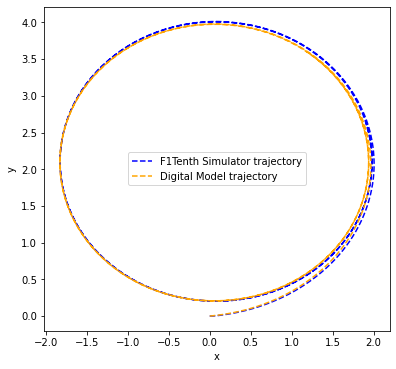

In [37]:
# plot robot trajectory
# fixing the plotsize
fig = plt.figure(figsize=(6, 6))
h = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
v = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.5)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))

plt.plot(x_data, y_data, color='blue', linestyle='dashed', label='F1Tenth Simulator trajectory')
plt.plot(x_cosim, y_cosim, color='orange', linestyle='dashed', label='Digital Model trajectory')
plt.xlabel('x')
plt.ylabel('y')


plt.legend()

5961 5961


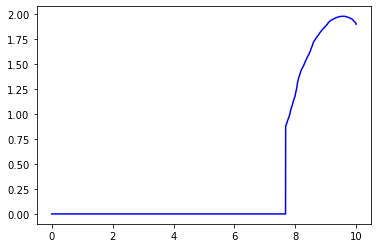

In [20]:
# trying to plot the length between points...

n = abs(len(x_cosim) - len(x_data))
m = abs(len(y_cosim) - len(y_data))

x_cosim_copy = x_cosim
y_cosim_copy = y_cosim
for i in range(n):
    x_cosim_copy = np.delete(x_cosim_copy, len(x_cosim_copy)-1)
    
    
for i in range(m):
    y_cosim_copy = np.delete(y_cosim_copy, len(y_cosim_copy)-1)
    
#compute distances
distances = x_data
print(len(y_cosim_copy), len(y_data), )

for i in range(len(distances)):
    distances[i] = np.linalg.norm(np.array(x_data[i], y_data[i]) - np.array(x_cosim_copy[i], y_cosim_copy[i]))

t = np.linspace(0, simtime, len(x_data_copy))
plt.plot(t, x_data_copy, color='blue', label='distance')
plt.show()

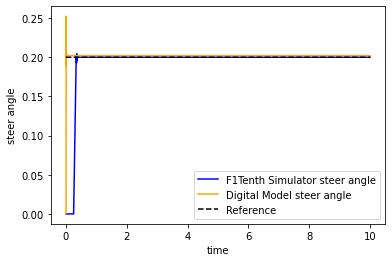

In [27]:
#plot steering angle controller performance

t1 = np.linspace(0, simtime, len(angle_data))
t2 = np.linspace(0, simtime, len(angle_cosim))
t3 = np.linspace(0, simtime, len(angle_cosim))
value = 0.2
reference = np.ones(len(t3))*value
plt.plot(t1, angle_data, color='blue', label='F1Tenth Simulator steer angle')
plt.plot(t2, angle_cosim, color='orange', label='Digital Model steer angle')
plt.plot(t3, reference, color='black',linestyle='dashed', label='Reference')
plt.xlabel('time')
plt.ylabel('steer angle')
plt.legend()

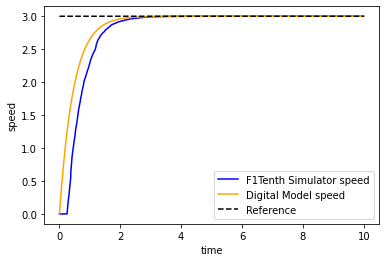

In [28]:
#plot speed controller performance
_t1 = np.linspace(0, simtime, len(speed_data))
_t2 = np.linspace(0, simtime, len(speed_cosim))
_t3 = np.linspace(0, simtime, len(speed_cosim))
_value = 3
_reference = np.ones(len(_t3))*_value
plt.plot(_t1, speed_data, color='blue', label='F1Tenth Simulator speed')
plt.plot(_t2, speed_cosim, color='orange', label='Digital Model speed')
plt.plot(_t3, _reference, color='black',linestyle='dashed', label='Reference')
plt.xlabel('time')
plt.ylabel('speed')
plt.legend()

In [ ]:
#plot distance traveled over time:
